In [50]:
# imports 
import numpy as np
import pandas as pd

# matplotlib used to visualise the data
import matplotlib.pyplot as plt
#
from keras.datasets import mnist
# used to encode labels
from keras.utils import to_categorical

# sequential model to create keras model. 
from keras.models import Sequential, model_from_json
from keras.layers import Conv2D, MaxPool2D, Dropout, Dense, Flatten
# for data augmentation
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop
# reduced the learning rate on plateau
from keras.callbacks import ReduceLROnPlateau
# to check if the model is already trained
import os

In [51]:
# method to get data
def getData():
    # training set and test set tuples. then call method to load data  
    (X_train, Y_train), (X_test, Y_test) = mnist.load_data() 
    # specify width and height of image
    img_rows, img_cols = 28, 28
    
    # encode labels 
    Y_train = to_categorical(Y_train, num_classes=10)
    Y_test = to_categorical(Y_test, num_classes=10)
    
    # reshape
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    
    # reshape it back because matplotlib wants a vector
    plt.imshow(X_train[0][:,:,0])
    # show graph
    plt.show()
    
    # return the data
    return X_train, Y_train, X_test, Y_test

# call the data
#getData()
   
    

In [ ]:
def trainModel(X_train, Y_train, X_test, Y_test):
    # tells keras how much data it should take in at once
    batch_size = 64
    # how many times to train on the full data
    epochs = 15
    
    # create model by calling sequential method
    model = Sequential()
    
    # FEATURE EXTRACTION
    # two convoluted layers w/ 32 filters each & window size of 5,5
    # input size set of first layer
    model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(28,28,1)))
    model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
    # specify pooling layer
    model.add(MaxPool2D(pool_size=(2,2)))
    # droput layer @ 25% of neurals randomly
    model.add(Dropout(rate=0.25))
    
    # two more convoluted layers w/ 64 filters each and window size 3,3
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(rate=0.25))
    
    # Flatten output
    model.add(Flatten())
    # fully connected layer
    model.add(Dense(256, activation='relu'))
    # 50% dropout rate
    model.add(Dropout(rate=0.5))
    # fully connected layer for every digit 0...9
    # softmax function gives probability back
    model.add(Dense(10, activation='softmax'))
    
    optimizer = RMSprop(lr=0.001)
    learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, min_lr=0.00001)
    
    datagen = ImageDataGenerator(
            rotation_range=10,
            zoom_range=0.1,
            width_shift_range=0.1,
            height_shift_range=0.1)
    
   # compiling and training the model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    # use fit_generator because imagedatagenerator was used
    # call datagen.flow to get data
    history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size), epochs=epochs,
                                  # verbose used to print something to the console
                                  validation_data=(X_test, y_test), verbose=2,
                                  steps_per_epoch=X_train.shape[0]//batch_size,
                                  callbacks=[learning_rate_reduction])
    # saving the model
    # model_json saves the structure from trainmodel method
    model_json = model.to_json()
    # saves the model to this file
    with open('model.json', 'w') as json_file:
        json_file.write(model_json)
        # saves it as this
    model.save_weights('mnist_model.h5')
    return model

def loadModel():
    # loads the structure of the model
    json_file = open('model.json', 'r')
    model_json = json_file.read()
    json_file.close()
    # creates the model
    model = model_from_json(model_json)
    # loads the weights
    model.load_weights("mnist_model.h5")
    return model

    X_train, y_train, X_test, y_test = getData()

    # checks if the model exists. it it does, load it. if not, it needs to be trained.
    if(not os.path.exists('mnist_model.h5')):
        model = trainModel(X_train, y_train, X_test, y_test)
        print('trained model')
        print(model.summary())
    else:
        model = loadModel()
        print('loaded model')
        print(model.summary())

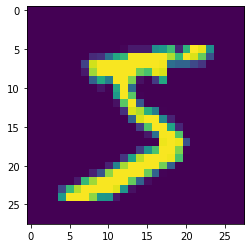

AttributeError: 'function' object has no attribute 'generator'